In [40]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [41]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [42]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [43]:
# create engine to hawaii.sqlite
hawaii_database_path = "../Instructions/Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{hawaii_database_path}")
connection = engine.connect()

In [44]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [45]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [46]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [47]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [48]:
# Find the most recent date in the data set.
most_recent = engine.execute('select max(date) from measurement').fetchall()
print(most_recent)

[('2017-08-23',)]


<AxesSubplot:xlabel='date'>

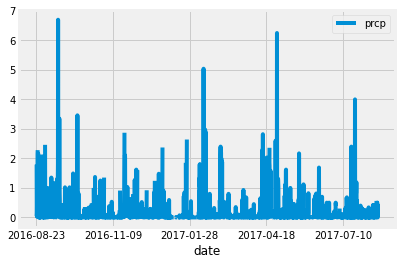

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = session.query(measurement.date, measurement.prcp).filter(measurement.date > "2016-08-22").all()

# Perform a query to retrieve the data and precipitation scores
#print(last_year)

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(last_year).set_index('date')
#precip_df.head()

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='date')
#precip_df.head()
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()



In [58]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()